# WWW::LLaMA guide

Anton Antonov     
[RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com)   
[RakuForPrediction at GitHub](https://github.com/antononcube/RakuForPrediction-blog)   
March 2024


## Introduction

The Raku package ["WWW::LLaMA"](https://raku.land/zef:antononcube/WWW::LLaMA) 
provides access to the machine learning service [llamafile](https://github.com/mozilla-Ocho/llamafile), [MO1].
For more details of the llamafile's API usage see [the documentation](https://github.com/mozilla-Ocho/llamafile?tab=readme-ov-file), [MO2].

This package is very similar to the packages 
["WWW::OpenAI"](https://github.com/antononcube/Raku-WWW-OpenAI), [AAp1], and 
["WWW::MistralAI"](https://github.com/antononcube/Raku-WWW-MistralAI), [AAp2]. 

"WWW::LLaMA" can be used with (is integrated with) 
["LLM::Functions"](https://github.com/antononcube/Raku-LLM-Functions), [AAp3], and
["Jupyter::Chatbook"](https://github.com/antononcube/Raku-Jupyter-Chatbook), [AAp5].

Also, of course, prompts from 
["LLM::Prompts"](https://github.com/antononcube/Raku-LLM-Prompts), [AAp4],
can be used with LLaMA's functions.

**Remark:** The package ["WWW::OpenAI"](https://raku.land/zef:antononcube/WWW::OpenAI)
can be also used to access 
["llamafile" chat completions](https://github.com/Mozilla-Ocho/llamafile/blob/main/llama.cpp/server/README.md#api-endpoints).
That is done by specifying appropriate base URL to the `openai-chat-completion` function.

**Remark:** LLaMA stands for ["Large Language Model Meta AI"](https://en.wikipedia.org/wiki/LLaMA).


-----

## Installation

Package installations from both sources use [zef installer](https://github.com/ugexe/zef)
(which should be bundled with the "standard" Rakudo installation file.)

To install the package from [Zef ecosystem](https://raku.land/) use the shell command:

```
zef install WWW::LLaMA
```

To install the package from the GitHub repository use the shell command:

```
zef install https://github.com/antononcube/Raku-WWW-LLaMA.git
```

----

## Install and run LLaMA server

In order to use the package access to LLaMA server is required.

Since the package follows closely the Web API of ["llamafile"](https://github.com/Mozilla-Ocho/llamafile/), [MO1],
it is advised to follow first the installation steps in the section of ["Quickstart"](https://github.com/Mozilla-Ocho/llamafile/tree/main#quickstart)
of [MO1] before trying the functions of the package.

------

## Chatbook support

Raku Chatbooks -- Jupyter notebooks with the ["Jupyter::Chatbook"](https://raku.land/zef:antononcube/Jupyter::Chatbook) kernel -- have LLaMA cells. Here are a few examples:

In [30]:
#% llama
Give very short description of the animal raccoon.

A raccoon is a medium-sized mammal with a distinctive black "mask" around its eyes and ringed tail. They are omnivores, known for their dexterity and ability to use their hands to find food. Raccoons are native to North America and can be found in forests, woodlands, wetlands, and suburban areas.


In [ ]:
#% llama
Give random pet names.

In [27]:
#% mermaid
flowchart LR
    OpenAI{{OpenAI}}
    PaLM{{PaLM}}
    MistralAI{{MistralAI}}
    LLaMA{{LLaMA}}
    LLMFunc[[LLM::Functions]]
    LLMProm[[LLM::Prompts]]
    CODB[(Chat objects)]
    PDB[(Prompts)]
    CCell[/Chat cell/]
    CRCell[/Chat result cell/]
    CIDQ{Chat ID<br>specified?}
    CIDEQ{Chat ID<br>exists in DB?}
    RECO[Retrieve existing<br>chat object]
    COEval[Message<br>evaluation]
    PromParse[Prompt<br>DSL spec parsing]
    KPFQ{Known<br>prompts<br/>found?}
    PromExp[Prompt<br>expansion]
    CNCO[Create new<br>chat object]
    CIDNone["Assume chat ID<br/>is 'NONE'"] 
    subgraph Chatbook frontend    
        CCell
        CRCell
    end
    subgraph Chatbook backend
        CIDQ
        CIDEQ
        CIDNone
        RECO
        CNCO
        CODB
    end
    subgraph Prompt processing
        PDB
        LLMProm
        PromParse
        KPFQ
        PromExp 
    end
    subgraph LLM interaction
      COEval
      LLMFunc
      subgraph Web[Web]
        OpenAI
        PaLM
        MistralAI
      end
      subgraph Computer[Computer]
        LLaMA
      end
      style Computer fill:pink
      style Web fill:lightblue
    end
    CCell --> CIDQ
    CIDQ --> |yes| CIDEQ
    CIDEQ --> |yes| RECO
    RECO --> PromParse
    COEval --> CRCell
    CIDEQ -.- CODB
    CIDEQ --> |no| CNCO
    LLMFunc -.- CNCO -.- CODB
    CNCO --> PromParse --> KPFQ
    KPFQ --> |yes| PromExp
    KPFQ --> |no| COEval
    PromParse -.- LLMProm 
    PromExp -.- LLMProm
    PromExp --> COEval 
    LLMProm -.- PDB
    CIDQ --> |no| CIDNone
    CIDNone --> CIDEQ
    COEval -.- LLMFunc
    LLMFunc <-.-> OpenAI
    LLMFunc <-.-> PaLM
    LLMFunc <-.-> MistralAI
    LLMFunc <-.-> LLaMA

LLM interaction Prompt processing Chatbook backend Chatbook frontend Web Computer <path d="M580.562,906.013L588.194,909.352C595.826,912.691,611.09,919.368,622.889,922.707C634.687,926.046,643.021,926.046,652.798,926.046C662.576,926.046,673.797,926.046,695.307,926.046C716.818,926.046,748.617,926.046,780.417,926.046C812.216,926.046,844.016,926.046,868.324,923.004C892.633,919.963,909.451,913.881,917.86,910.839L926.269,907.798" id="L-CIDQ-CIDEQ-0" class=" edge-thickness-normal edge-pattern-solid flowchart-link LS-CIDQ LE-CIDEQ" style="fill:none;" marker-end="url(#mermaid-svg_flowchart-pointEnd)"> <path d="M270.322,257.5L285.728,302.031C301.135,346.561,331.947,435.622,351.521,480.153C371.094,524.684,379.427,524.684,387.76,524.684C396.094,524.684,404.427,524.684,412.76,524.684C421.094,524.684,429.427,524.684,449.31,524.684C469.193,524.684,500.625,524.684,532.057,524.684C563.49,524.684,594.922,524.684,614.805,524.684C634.687,524.684,643.021,524.684,652.798,563.136C662.576,601.588,673.797,678.493,695.307,716.945C716.818,755.397,748.617,755.397,780.417,755.397C812.216,755.397,844.016,755.397,878.551,755.397C913.086,755.397,950.357,755.397,988.108,755.397C1025.859,755.397,1064.091,755.397,1092.423,756.785C1120.755,758.173,1139.187,760.949,1148.404,762.337L1157.62,763.725" id="L-LLMFunc-CNCO-0" class=" edge-thickness-normal edge-pattern-dotted flowchart-link LS-LLMFunc LE-CNCO" style="fill:none;stroke-width:2px;stroke-dasharray:3;"> <path d="M1578.344,523.534L1570.621,520.392C1562.899,517.251,1547.455,510.967,1535.566,507.825C1523.677,504.684,1515.344,504.684,1495.923,504.684C1476.503,504.684,1445.995,504.684,1415.487,504.684C1384.979,504.684,1354.471,504.684,1335.051,504.684C1315.63,504.684,1307.297,504.684,1287.706,504.684C1268.115,504.684,1237.266,504.684,1204.492,504.684C1171.719,504.684,1137.021,504.684,1100.556,504.684C1064.091,504.684,1025.859,504.684,988.108,504.684C950.357,504.684,913.086,504.684,878.551,504.684C844.016,504.684,812.216,504.684,780.417,504.684C748.617,504.684,716.818,504.684,695.307,504.684C673.797,504.684,662.576,504.684,652.798,504.684C643.021,504.684,634.687,504.684,614.805,504.684C594.922,504.684,563.49,504.684,532.057,504.684C500.625,504.684,469.193,504.684,449.31,504.684C429.427,504.684,421.094,504.684,412.76,504.684C404.427,504.684,396.094,504.684,387.76,504.684C379.427,504.684,371.094,504.684,350.454,504.684C329.813,504.684,296.866,504.684,263.919,504.684C230.972,504.684,198.025,504.684,177.385,504.684C156.745,504.684,148.411,504.684,137.14,496.795C125.869,488.906,111.66,473.128,104.555,465.239L97.451,457.35" id="L-KPFQ-COEval-0" class=" edge-thickness-normal edge-pattern-solid flowchart-link LS-KPFQ LE-COEval" style="fill:none;" marker-end="url(#mermaid-svg_flowchart-pointEnd)"> <path d="M1482.01,645.271L1486.177,646.348C1490.344,647.426,1498.677,649.58,1507.01,650.657C1515.344,651.734,1523.677,651.734,1544.155,651.734C1564.633,651.734,1597.255,651.734,1631.802,651.734C1666.349,651.734,1702.82,651.734,1734.328,651.734C1765.836,651.734,1792.38,651.734,1817,651.734C1841.62,651.734,1864.315,651.734,1888.782,631.548C1913.249,611.362,1939.487,570.99,1952.606,550.803L1965.726,530.617" id="L-PromParse-LLMProm-0" class=" edge-thickness-normal edge-pattern-dotted flowchart-link LS-PromParse LE-LLMProm" style="fill:none;stroke-width:2px;stroke-dasharray:3;"> <path d="M1775.839,446.64L1769.747,444.867C1763.656,443.093,1751.474,439.547,1727.147,437.773C1702.82,436,1666.349,436,1631.802,436C1597.255,436,1564.633,436,1544.155,436C1523.677,436,1515.344,436,1495.923,436C1476.503,436,1445.995,436,1415.487,436C1384.979,436,1354.471,436,1335.051,436C1315.63,436,1307.297,436,1287.706,436C1268.115,436,1237.266,436,1204.492,436C1171.719,436,1137.021,436,1100.556,436C1064.091,436,1025.859,436,988.108,436C950.357,436,913.086,436,878.551,436C844.016,436,812.216,436,780.417,436C748.617,436,716.818,436,695.307,436C673.797,436,662.576,436,652.798,436C643.021,436,634.687,436,614.805,436C594.922,436,563.49,436,532.057,436C500.625,436,


----

## Setup

### Base URL

The base URL for accessing the LLaMA server can both retrieved and set with the function `llama-base-url`. Here is the default base URL:

In [31]:
llama-base-url

http://127.0.0.1:8080

Here is we set a new URL:

In [32]:
llama-base-url('http://127.0.0.1:5060')

http://127.0.0.1:5060

To reset the base URL `Whatever` can be used as an argument:

In [33]:
llama-base-url(Whatever)

http://127.0.0.1:8080

### Auth key (optional)

When the authorization key, `auth-key`, is specified to be `Whatever`
then it is assigned the string `sk-no-key-required`.
If an authorization key is required then the env variable `LLAMA_API_KEY` can be also used.

-----

## Universal "front-end"

The package has an universal "front-end" function `llama-playground` for the 
[different functionalities provided by llamafile](https://github.com/Mozilla-Ocho/llamafile/blob/main/README.md).

Here is a simple call for a "chat completion":

In [34]:
#use WWW::LLaMA;
llama-playground('What is the speed of a rocket leaving Earth?');

{content => 

The, generation_settings => {frequency_penalty => 0, grammar => , ignore_eos => False, logit_bias => [], min_p => 0.05000000074505806, mirostat => 0, mirostat_eta => 0.10000000149011612, mirostat_tau => 5, model => mistral-7b-instruct-v0.2.Q5_K_M.gguf, n_ctx => 4096, n_keep => 0, n_predict => -1, n_probs => 0, penalize_nl => True, penalty_prompt_tokens => [], presence_penalty => 0, repeat_last_n => 64, repeat_penalty => 1.100000023841858, seed => 4294967295, stop => [], stream => False, temperature => 0.800000011920929, tfs_z => 1, top_k => 40, top_p => 0.949999988079071, typical_p => 1, use_penalty_prompt_tokens => False}, model => mistral-7b-instruct-v0.2.Q5_K_M.gguf, prompt => What is the speed of a rocket leaving Earth?, slot_id => 0, stop => True, stopped_eos => False, stopped_limit => True, stopped_word => False, stopping_word => , timings => {predicted_ms => 136.317, predicted_n => 3, predicted_per_second => 22.007526574088338, predicted_per_token_ms => 45.439, pro

**Remark:** Chatbooks load the package "WWW::LLaMA" automatically into the global namespace.

Another one using Bulgarian:

In [36]:
llama-playground('Колко групи могат да се намерят в този облак от точки.', max-tokens => 300, seed => 23232, format => 'values');



You can find 3 groups in this cloud of points. One group consists of 5 points located at the top left corner of the cloud, another group has 4 points at the bottom right part and the third one is a single point located near the center of the cloud.

**Remark:** The functions `llama-chat-completion` or `llama-completion` can be used instead in the examples above.
(The latter is synonym of the former.)

------

## Models

The current LLaMA model can be found with the function `llama-model`:

In [37]:
llama-model;

mistral-7b-instruct-v0.2.Q5_K_M.gguf

**Remark:** Since there is no dedicated API endpoint for getting the model(s),
the current model is obtained via "simple" (non-chat) completion.

------

## Code generation

There are two types of completions : text and chat. Let us illustrate the differences
of their usage by Raku code generation. Here is a text completion:

In [38]:
llama-text-completion(
        'Generate Raku code for making a loop over a list',
        max-tokens => 120,
        format => 'values');

, and within each iteration, print out the index and the value.

Here's an example Raku code that demonstrates a loop over a list and prints out both the index and the value at each iteration:

```raku
my @numbers = (1, 2, 3, 4, 5);

for my $number (@numbers) {
    say "Index: {$_ INDEX}, Value: {$number}";
}
```

In this example, we define a list `@numbers`

Here is a chat completion:

In [39]:
# A shortcut to llama-chat-completion()

llama-completion(
        'generate Raku code for making a loop over a list',
        max-tokens => 120,
        format => 'values');

To create a loop over a list in Raku, you can use the `for` statement with the `Xx` infix operator. Here's an example:
```raku
my @list = (1, 2, 3, 4, 5);

for my $element (@list) {
    # Do something with each element
    say "Element is: ", $element;
}
```
In this example, `@list` is a list of numbers. The loop goes through each number in the list and assign

------

## Embeddings

Embeddings can be obtained with the function `llama-embedding`. Here is an example of finding the embedding vectors
for each of the elements of an array of strings:

In [40]:
my @queries = [
    'make a classifier with the method RandomForeset over the data dfTitanic',
    'show precision and accuracy',
    'plot True Positive Rate vs Positive Predictive Value',
    'what is a good meat and potatoes recipe'
];

my $embs = llama-embedding(@queries, format => 'values', method => 'tiny');
$embs.elems;

4

Here we show:
- That the result is an array of four vectors each with length 1536
- The distributions of the values of each vector

In [41]:
use Data::Reshapers;
use Data::Summarizers;

say "\$embs.elems : { $embs.elems }";
say "\$embs>>.elems : { $embs>>.elems }";
sink records-summary($embs.kv.Hash.&transpose);

$embs.elems : 4
$embs>>.elems : 4096 4096 4096 4096
+----------------------------------+----------------------------------+--------------------------------+---------------------------------+
| 3                                | 0                                | 2                              | 1                               |
+----------------------------------+----------------------------------+--------------------------------+---------------------------------+
| Min    => -86.64485931396484     | Min    => -150.1730194091797     | Min    => -85.12604522705078   | Min    => -115.55949401855469   |
| 1st-Qu => -3.18321657180786135   | 1st-Qu => -3.1311671733856201    | 1st-Qu => -3.4018837213516235  | 1st-Qu => -2.5787762403488159   |
| Mean   => -0.0953787748984638    | Mean   => -0.0024599628797898794 | Mean   => -0.02784229526803017 | Mean   => -0.019579125041847334 |
| Median => -0.0252206642180681235 | Median => 0.0594599936157465     | Median => -0.12382630631327629 | Median =>

Here we find the corresponding dot products and (cross-)tabulate them:

In [42]:
use Data::Reshapers;
use Data::Summarizers;
my @ct = (^$embs.elems X ^$embs.elems).map({ %( i => $_[0], j => $_[1], dot => sum($embs[$_[0]] >>*<< $embs[$_[1]])) }).Array;

say to-pretty-table(cross-tabulate(@ct, 'i', 'j', 'dot'), field-names => (^$embs.elems)>>.Str);

+---+---------------+---------------+---------------+---------------+
|   |       0       |       1       |       2       |       3       |
+---+---------------+---------------+---------------+---------------+
| 0 | 149739.714274 |  43728.546745 |  45860.578925 |  32184.330663 |
| 1 |  43728.546745 | 102867.905887 |  46243.876793 |  38526.293732 |
| 2 |  45860.578925 |  46243.876793 | 133800.798610 |  31927.097299 |
| 3 |  32184.330663 |  38526.293732 |  31927.097299 | 127918.331646 |
+---+---------------+---------------+---------------+---------------+


**Remark:** Note that the fourth element (the cooking recipe request) is an outlier.
(Judging by the table with dot products.)

------

## Tokenizing and de-tokenizing

Here we tokenize some text:

In [43]:
my $txt = @queries.head;
my $res = llama-tokenize($txt, format => 'values');

[1038 264 875 3591 395 272 2038 20575 28765 3626 299 754 272 1178 13808 28738 11374 294]

Here we get the original text be de-tokenizing:

In [44]:
llama-detokenize($res);

{content =>  make a classifier with the method RandomForeset over the data dfTitanic}

In [45]:
use HTTP::Tiny;
my $htmlArticleOrig = HTTP::Tiny.get("https://writings.stephenwolfram.com/2024/03/can-ai-solve-science/")<content>.decode;
sub text-stats(Str:D $txt) { <chars words lines> Z=> [$txt.chars, $txt.words.elems, $txt.lines.elems] };

text-stats($htmlArticleOrig)

(chars => 218929 words => 20218 lines => 1433)

In [46]:
say llama-tokenize($htmlArticleOrig);
say '·🦙📂' x 20;
say llama-tokenize($htmlArticleOrig, format=>'values').elems;

{tokens => [523 28808 5170 1386 12492 12383 28767 13 28789 3391 9848 735 269 28739 11398 735 10967 28747 3550 1508 2849 28723 23744 28723 675 28748 28750 28734 28734 28783 28748 10967 1653 28725 6050 28747 3550 1508 476 28720 28723 1127 28748 2925 28771 1355 13 28789 1811 28767 13 13 18449 2839 10782 1335 481 6998 13 13 2287 523 8301 3550 28733 13220 735 28744 28733 3772 28733 23719 28739 3036 735 412 28746 8424 1355 13 2287 523 8301 1141 735 1578 483 28739 3036 735 2617 28746 3915 28733 2617 28725 3742 28733 5705 28746 ...]}
·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂·🦙📂
90927


-----

## Chat completions with engineered prompts

Here is a prompt for "emojification" (see the
[Wolfram Prompt Repository](https://resources.wolframcloud.com/PromptRepository/)
entry
["Emojify"](https://resources.wolframcloud.com/PromptRepository/resources/Emojify/)):

In [47]:
llm-prompt('Emojify')()

Rewrite the following text and convert some of it into emojis.
The emojis are all related to whatever is in the text.
Keep a lot of the text, but convert key words into emojis.
Do not modify the text except to add emoji.
Respond only with the modified text, do not include any summary or explanation.
Do not respond with only emoji, most of the text should remain as normal words.



Here is an example of chat completion with emojification:

In [48]:
llama-chat-completion([ system => llm-prompt('Emojify')(), user => 'Python sucks, Raku rocks, and Perl is annoying.'], max-tokens => 300, format => 'values')

 Python 🙁, Raku 😍, and Perl 🤫.

Here we define a translation LLM function and invoke it:

In [49]:
my &f2 = llm-function({llm-prompt('Translate')($^a, $^b)}, e => llm-configuration('LLaMA', temperature => 0.4));

'What is this about?'
==> {say($_); $_}()
==> &f2('German') 
==> {say($_); $_}() 
==> &f2('English') 
==> {.say}()

What is this about?
Das ist darüber, was dahintersteht.
That's about what's behind it.



--------

## Finding textual answers

Here is the an example of using a LLaMA model in an LLM-based Question Answering System (QAS) provided by ["ML::FindTextualAnswer"](https://raku.land/zef:antononcube/ML::FindTextualAnswer), [AAp6]:

In [51]:
use ML::FindTextualAnswer;

find-textual-answer(
    'Colors in preference order: blue, red, green, white, pink, cherry, light brown.', 
    [
        'How many colors are listed?',
        'What is the favorite color?',
        'Which the third color?'
    ],
    finder => 'LLaMA'
    ):pairs

{How many colors are listed? => 7, What is the favorite color? => N/A, Which the third color? => red}

------

## Vision

Consider the following [image](https://i.imgur.com/dtNEeHU.png):


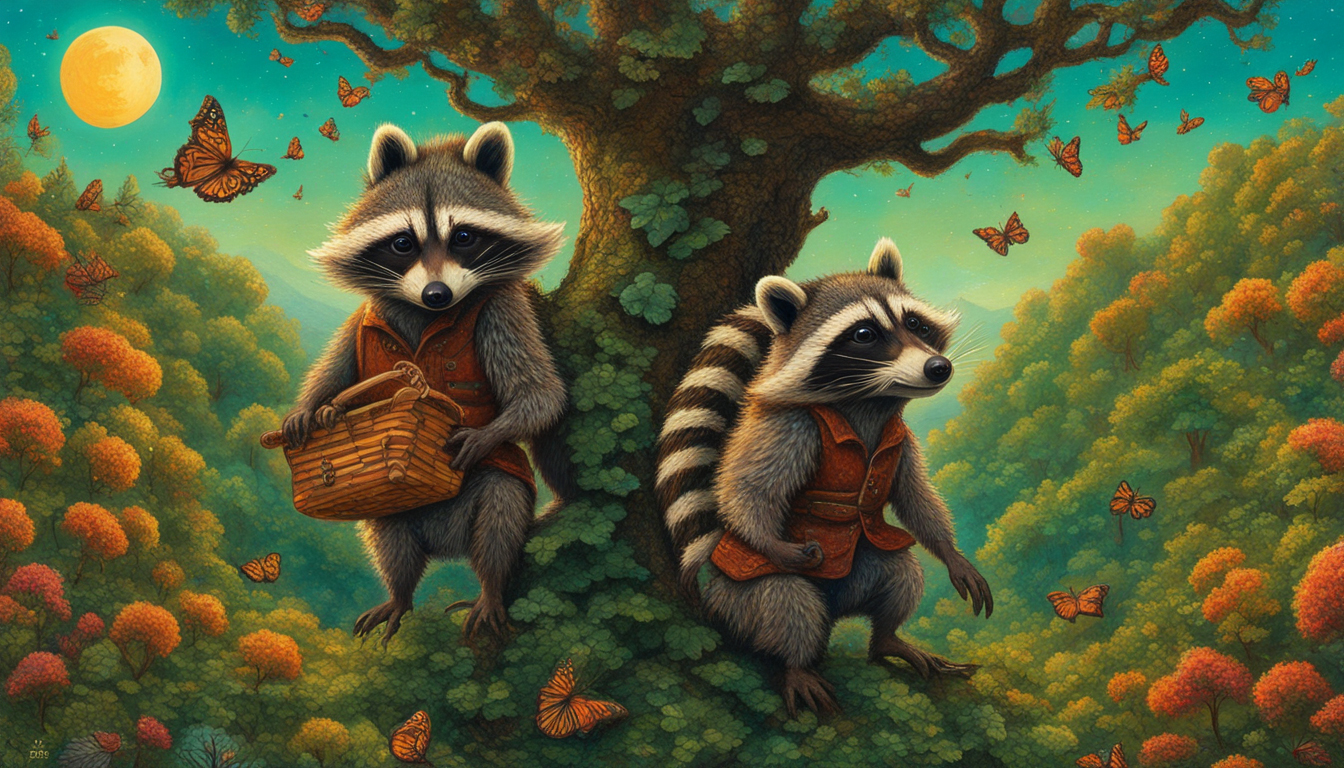

In [52]:
#% html
my $url ='https://i.imgur.com/dtNEeHU.png';
my $img = image-import($url, format => 'asis');
image-from-base64($img, width => 800)

Here we exemplify the use LLaMA "AI vision" capabilities:

In [54]:
llama-text-completion(
    "USER:[img-77]Describe the image.\nASSISTANT:",
    image-data => [{data => $img, id => 77},],
    temperature => 0.5,
    max-tokens => 200,
    format => 'values');

 The image features two cartoon-like raccoons sitting under a tree, each holding a basket. They are surrounded by multiple butterflies flying around them in the air, creating an idyllic scene. The butterflies are of different sizes and positions, adding to the lively atmosphere of the picture.

The raccoons seem to be enjoying their time together under the tree, while the butterflies fly freely, enhancing the overall charm and whimsy of the image.

**Remark:** Not all LLaMa models "have vision." LLaVA's AI vision seems to be a "hit or miss" -- some explanations are only approximately correct. 

**Remark:** With some of the non-vision models, although, image descriptions are obtained, they have no relations to the given images.

-------

## Command Line Interface

### Playground access

The package provides a Command Line Interface (CLI) script:


In [55]:
#% bash
llama-playground --help

Usage:
  llama-playground [<words> ...] [--path=<Str>] [--mt|--max-tokens[=Int]] [-m|--model=<Str>] [-r|--role=<Str>] [-t|--temperature[=Real]] [--response-format=<Str>] [-a|--auth-key=<Str>] [--timeout[=UInt]] [-f|--format=<Str>] [--method=<Str>] [--base-url=<Str>] -- Command given as a sequence of words.
  
    --path=<Str>               Path, one of 'completions', 'chat/completions', 'embeddings', 'models', 'tokenize', and 'detokenize'. [default: 'chat/completions']
    --mt|--max-tokens[=Int]    The maximum number of tokens to generate in the completion. [default: 2048]
    -m|--model=<Str>           Model. [default: 'Whatever']
    -r|--role=<Str>            Role. [default: 'user']
    -t|--temperature[=Real]    Temperature. [default: 0.7]
    --response-format=<Str>    The format in which the response is returned. [default: 'url']
    -a|--auth-key=<Str>        Authorization key (to use LLaMA server Web API.) [default: 'Whatever']
    --timeout[=UInt]           Timeout. [default:


**Remark:** When the authorization key, `auth-key`, is specified to be `Whatever`
then it is assigned the string `sk-no-key-required`.
If an authorization key is required then the env variable `LLAMA_API_KEY` can be also used.

--------

## Mermaid diagram

The following flowchart corresponds to the steps in the package function `llama-playground`:

In [56]:
#% mermaid
graph LR
	UI[/Some natural language text/]
	TO[/"LLaMA<br/>Processed output"/]
	WR[[Web request]]
	LLaMA{{http://127.0.0.1:8080}}
	PJ[Parse JSON]
	Q{Return<br>hash?}
	MSTC[Compose query]
	MURL[[Make URL]]
	TTC[Process]
	QAK{Auth key<br>supplied?}
	EAK[["Try to find<br>LLAMA_API_KEY<br>in %*ENV"]]
	QEAF{Auth key<br>found?}
	NAK[["Use 'sk-no-key-required'"]]
	UI --> QAK
	QAK --> |yes|MSTC
	QAK --> |no|EAK
	EAK --> QEAF
	MSTC --> TTC
	QEAF --> |no|NAK
	QEAF --> |yes|TTC
	TTC -.-> MURL -.-> WR -.-> TTC
	WR -.-> |URL|LLaMA 
	LLaMA -.-> |JSON|WR
	TTC --> Q 
	Q --> |yes|PJ
	Q --> |no|TO
	PJ --> TO

yes no no yes URL JSON yes no Some natural language text LLaMA Processed output Web request http://127.0.0.1:8080 Parse JSON Return hash? Compose query Make URL Process Auth key supplied? Try to find LLAMA_API_KEY in %*ENV Auth key found? Use 'sk-no-key-required'


--------

## References

### Packages

[AAp1] Anton Antonov,
[WWW::OpenAI Raku package](https://github.com/antononcube/Raku-WWW-OpenAI),
(2023-2024),
[GitHub/antononcube](https://github.com/antononcube).

[AAp2] Anton Antonov,
[WWW::MistralAI Raku package](https://github.com/antononcube/Raku-WWW-MistralAI),
(2023-2024),
[GitHub/antononcube](https://github.com/antononcube).

[AAp3] Anton Antonov,
[LLM::Functions Raku package](https://github.com/antononcube/Raku-LLM-Functions),
(2023-2024),
[GitHub/antononcube](https://github.com/antononcube).

[AAp4] Anton Antonov,
[LLM::Prompts Raku package](https://github.com/antononcube/Raku-LLM-Prompts),
(2023-2024),
[GitHub/antononcube](https://github.com/antononcube).

[AAp5] Anton Antonov,
[Jupyter::Chatbook Raku package](https://github.com/antononcube/Raku-Jupyter-Chatbook),
(2023),
[GitHub/antononcube](https://github.com/antononcube).

[AAp6] Anton Antonov,
[ML::FindTextualAnswer Raku package](https://github.com/antononcube/Raku-ML-FindTextualAnswer),
(2023-2024),
[GitHub/antononcube](https://github.com/antononcube).

[MO1] Mozilla Ocho, [llamafile](https://github.com/mozilla-Ocho/llamafile).

[MO2] Mozilla Ocho, [llamafile documentation](https://github.com/Mozilla-Ocho/llamafile/blob/main/README.md).